In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [18]:
pi = np.pi
pi2 = np.pi/2.
@np.vectorize
def bias(zenith, azimuth, amp1, amp2, off1, off2, phi):
    cosval = np.cos(zenith - pi2)**4
    amplitude = amp1 * cosval + amp2
    offset = off1 * cosval + off2
    sinval = np.abs(np.sin((azimuth - phi)*2.0))
    if (phi <= azimuth) and (azimuth < pi2+phi):
        sinval *= -0.5*amplitude
    elif (pi2+phi <= azimuth) and (azimuth < pi+phi):
        sinval *= amplitude
    elif (pi+phi <= azimuth) and (azimuth < pi+pi2+phi):
        sinval *= -0.5*amplitude
    elif (pi+pi2+phi <= azimuth) and (azimuth <= pi+pi+phi):
        sinval *= amplitude

    if phi > 0 and azimuth - phi < 0:
        sinval *= 2.0 * amplitude;
    if phi < 0 and azimuth - phi > 2*pi:
        sinval *= -1.0 * amplitude
    bias = (sinval + offset)
    return bias

cascade_params = [10.88, -0.9, 3.98, 0.20]
track_params = [0.,]*4
dc_params = [2.78, 1.13, 1.56, -1.09]
phi = -0.15707963267948966;

@np.vectorize
def altbias(zenith, azimuth, amp1, amp2, off1, off2, phi):
    mag = -np.sin((azimuth - phi)*2.)
    sign = np.sign(mag)
    if sign > 0:
        mag *= 1
    elif sign < 0:
        mag *= 0.5
    else:
        mag = 0
    cosval = np.cos(zenith - pi2)**4
    mag *= amp1 * cosval + amp2
    mag += off1 * cosval + off2
    return mag

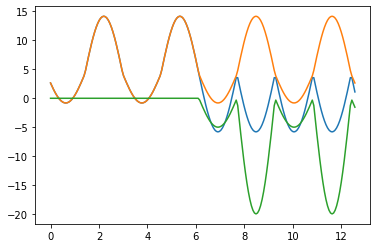

In [22]:
fig, ax = plt.subplots()
zenith = np.pi/2.0
azimuth = np.linspace(0, np.pi*4, 200+1)
ax.plot(azimuth, bias(zenith, azimuth, *cascade_params, phi))
ax.plot(azimuth, altbias(zenith, azimuth, *cascade_params, phi))
ax.plot(azimuth, bias(zenith, azimuth, *cascade_params, phi) - altbias(zenith, azimuth, *cascade_params, phi))
plt.show()